In [1]:
import pandas as panda
import matplotlib
from matplotlib import pyplot as plot
from datetime import datetime, date
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
columns = ['TurId','Dato','Fylke','Område','Kommune','Holdeplass_Fra','Holdeplass_Til','Linjetype','Linjefylke','Linjenavn','Linjeretning','Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra','Tidspunkt_Faktisk_Avgang_Holdeplass_Fra','Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra','Tidspunkt_Planlagt_Avgang_Holdeplass_Fra','Kjøretøy_Kapasitet','Passasjerer_Ombord']
dataframe = panda.read_csv("/Users/einar/Intro_to_AI/assignment1/Ruter_data.csv", sep=';', engine='python', encoding='UTF-8',names=columns)

In [3]:
dataframe.isnull().sum()

TurId                                        0
Dato                                         0
Fylke                                        0
Område                                       0
Kommune                                      0
Holdeplass_Fra                               0
Holdeplass_Til                               0
Linjetype                                    0
Linjefylke                                   0
Linjenavn                                    0
Linjeretning                                 0
Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra     0
Tidspunkt_Faktisk_Avgang_Holdeplass_Fra      0
Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra    0
Tidspunkt_Planlagt_Avgang_Holdeplass_Fra     0
Kjøretøy_Kapasitet                           0
Passasjerer_Ombord                           0
dtype: int64

In [4]:
dataframe.nunique()

TurId                                        5953
Dato                                           90
Fylke                                           2
Område                                          4
Kommune                                        34
Holdeplass_Fra                               1632
Holdeplass_Til                               1638
Linjetype                                       4
Linjefylke                                      2
Linjenavn                                     150
Linjeretning                                    2
Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra     5677
Tidspunkt_Faktisk_Avgang_Holdeplass_Fra      5749
Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra    1201
Tidspunkt_Planlagt_Avgang_Holdeplass_Fra     1201
Kjøretøy_Kapasitet                             18
Passasjerer_Ombord                             70
dtype: int64

In [5]:
dataframe.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [6]:
dataframe.shape

(6000, 17)

<AxesSubplot:xlabel='Fylke', ylabel='count'>

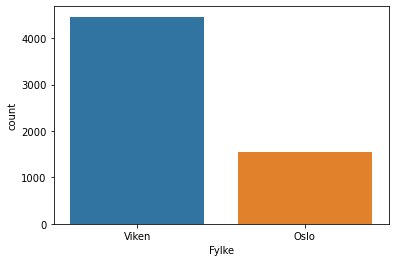

In [7]:
sns.countplot(x='Fylke', data=dataframe)

<AxesSubplot:xlabel='Område', ylabel='count'>

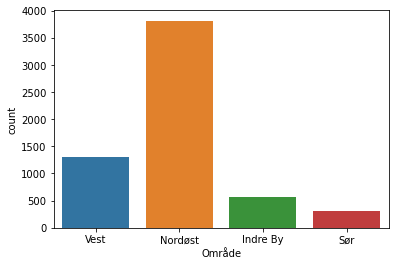

In [8]:
sns.countplot(x='Område', data=dataframe)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'Bærum'),
  Text(1, 0, 'Bjerke'),
  Text(2, 0, 'St.Hanshaugen'),
  Text(3, 0, 'Indre Østfold'),
  Text(4, 0, 'Sentrum'),
  Text(5, 0, 'Ullensaker'),
  Text(6, 0, 'Eidsvoll'),
  Text(7, 0, 'Lørenskog'),
  Text(8, 0, 'Asker'),
  Text(9, 0, 'Lillestrøm'),
  Text(10, 0, 'Rælingen'),
  Text(11, 0, 'Alna'),
  Text(12, 0, 'Aurskog-Høland'),
  Text(13, 0, 'Gamle Oslo'),
  Text(14, 0, 'Nannestad'),
  Text(15, 0, 'Hurdal'),
  Text(16, 0, 'Gjerdrum'),
  Text(17, 0, 'Enebakk'),
  Text(18, 0, 'Stovner'),
  Text(19, 0, 'Nes'),
  Text(20, 0, 'Grünerløkka'),
  Text(21, 0, 'Nordmarka'),
  Text(22, 0, 'Grorud'),
  Text(23, 0, 'Ullern'),
  Text(24, 0, 'Vestre Aker'),
  Text(25, 0, 'Nittedal'),
  Text(26, 0, 'Nordstrand'),
  Text(27, 0, 'Nordre Follo'),
  Text(28, 0, 'Sagene'),
  Text(29, 0, 'Søndre Nordstrand'),
  Text(30, 0, 'Nordre Aker')

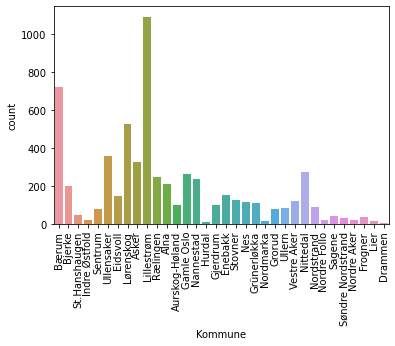

In [9]:
sns.countplot(x='Kommune', data=dataframe)
plot.xticks(rotation=90)

<AxesSubplot:xlabel='Ukedag', ylabel='count'>

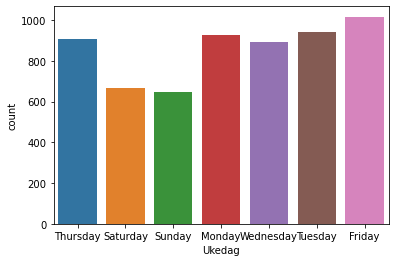

In [10]:
dataframe['Dato'] = panda.to_datetime(dataframe['Dato'])
dataframe['Ukedag'] = dataframe['Dato'].dt.day_name()
sns.countplot(x='Ukedag', data=dataframe)

In [11]:
dataframe['Måned'] = panda.to_datetime(dataframe.Dato, format='%d/%m/%Y').dt.month_name()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'October'),
  Text(1, 0, 'August'),
  Text(2, 0, 'March'),
  Text(3, 0, 'July'),
  Text(4, 0, 'January'),
  Text(5, 0, 'June'),
  Text(6, 0, 'December'),
  Text(7, 0, 'November'),
  Text(8, 0, 'February'),
  Text(9, 0, 'September'),
  Text(10, 0, 'April'),
  Text(11, 0, 'May')])

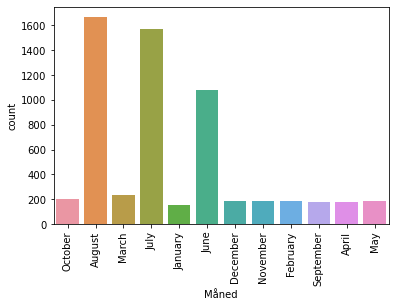

In [12]:
sns.countplot(x='Måned', data=dataframe)
plot.xticks(rotation=90)

In [13]:
datafram_corr = dataframe.corr()
datafram_corr

,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord
Linjeretning,1.000000,0.020337,-0.042414
Kjøretøy_Kapasitet,0.020337,1.000000,0.129959
Passasjerer_Ombord,-0.042414,0.129959,1.000000


In [14]:
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Linjeretning,6000.0,0.492000,0.499978,0.0,0.0,0.0,1.0,1.0
Kjøretøy_Kapasitet,6000.0,104.712167,24.225196,33.0,80.0,106.0,112.0,151.0
Passasjerer_Ombord,6000.0,4.512833,6.735730,-39.0,0.0,3.0,7.0,64.0


<AxesSubplot:>

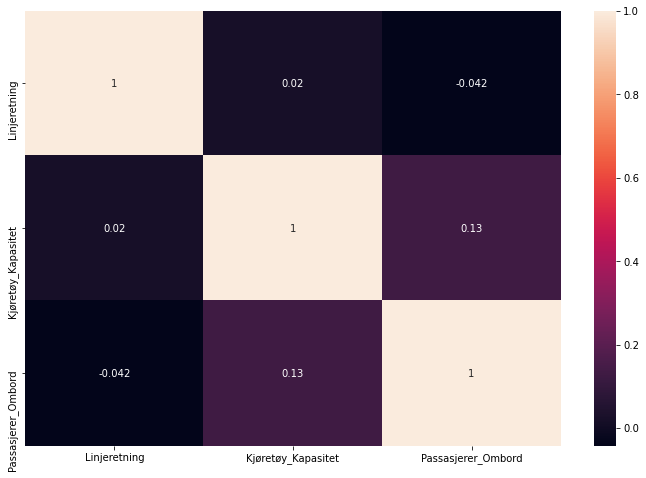

In [15]:
fig, ax = plot.subplots(figsize = (12,8))
sns.heatmap(datafram_corr,annot = True)

In [16]:
x = dataframe[['Kjøretøy_Kapasitet']]
y = dataframe[['Passasjerer_Ombord']]

x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2)

linear_model = LinearRegression(normalize=True).fit(x_train,y_train)

In [17]:
print('Traning score: ', linear_model.score(x_train, y_train))

Traning score:  0.018845015751960514


In [18]:
y_pred = linear_model.predict(x_test)

print('Testing score: ',r2_score(y_test, y_pred))

Testing score:  0.007438387472733954


<AxesSubplot:xlabel='Kjøretøy_Kapasitet', ylabel='Passasjerer_Ombord'>

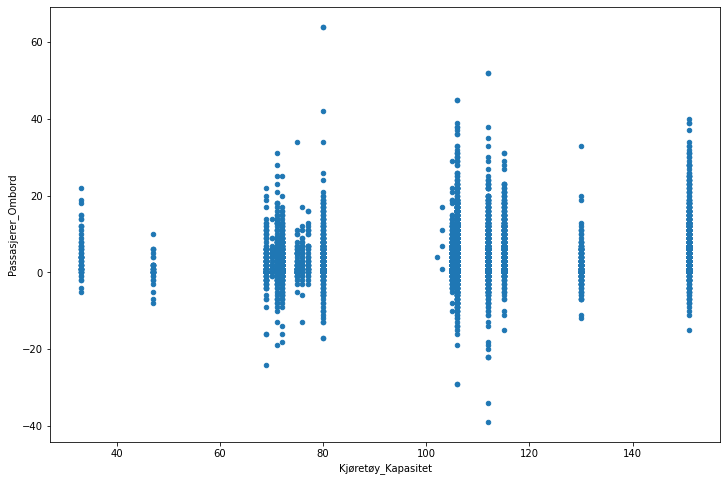

In [19]:
dataframe.plot.scatter(x='Kjøretøy_Kapasitet', y='Passasjerer_Ombord', figsize = (12,8))

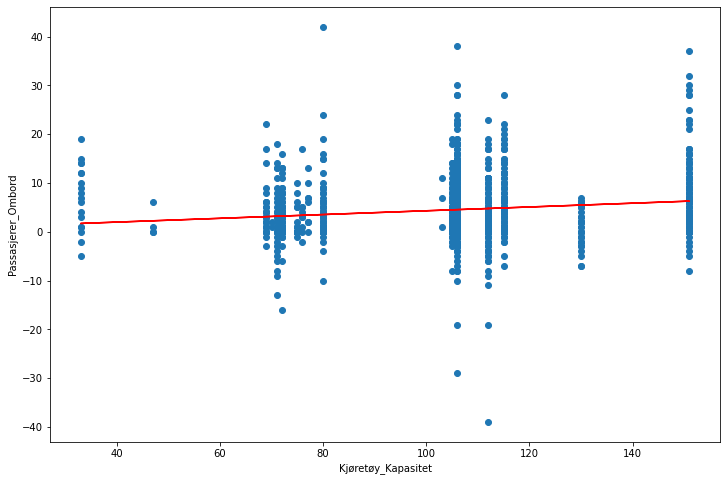

In [20]:
fig, ax = plot.subplots(figsize = (12,8))
plot.scatter(x_test,y_test)
plot.plot(x_test, y_pred, color='r')
plot.xlabel('Kjøretøy_Kapasitet')
plot.ylabel('Passasjerer_Ombord')
plot.show()

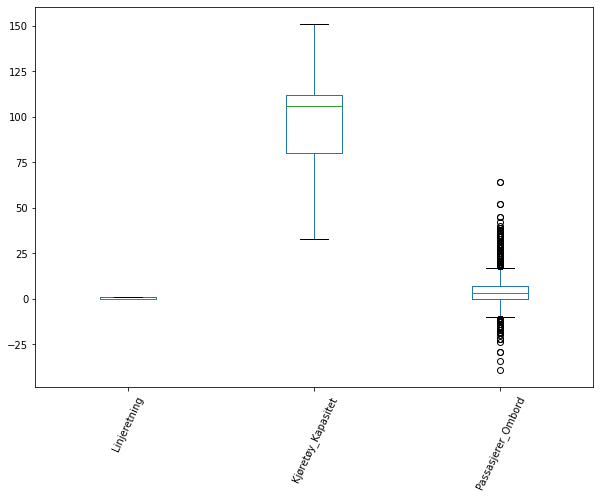

In [21]:
boxplot = dataframe.boxplot(grid=False,rot=65,figsize=(10,7));

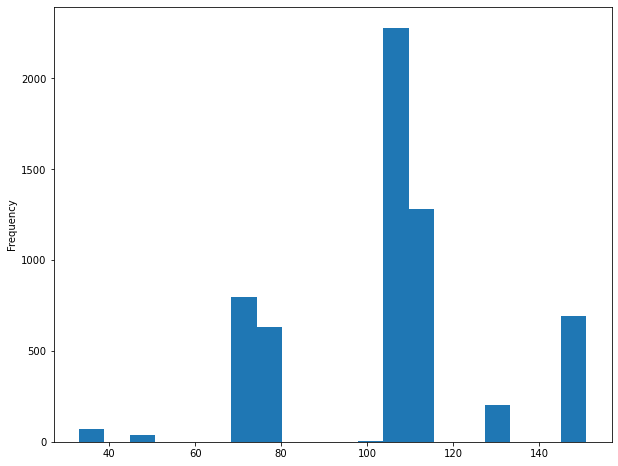

In [22]:
dataframe['Kjøretøy_Kapasitet'].plot.hist(bins=20,figsize=(10,8));